In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import requests
from io import BytesIO
import seaborn
plt.style.use('ggplot')
seaborn.set_context('talk')

In [3]:
# TFP
link = "http://www.longtermproductivity.com/download/BCLDatabase_online_v2.0.xlsx"
file = requests.get(link)
with BytesIO(file.content) as TFP:

    tfp = pd.read_excel(TFP, sheet_name="TFP")
tfp = tfp.iloc[:, :-2].dropna(how="all")

In [4]:
tfp=tfp.pct_change()

In [5]:
tfp.describe().T.sort_values('mean')

,count,mean,std,min,25%,50%,75%,max
MEX,126.0,0.008561,0.037386,-0.155092,-0.005751,0.011460,0.024455,0.110835
AUS,126.0,0.008614,0.036720,-0.169888,-0.002128,0.008698,0.027691,0.126243
GBR,126.0,0.011698,0.022864,-0.078090,0.002267,0.011180,0.026097,0.060956
NZL,126.0,0.012289,0.042005,-0.082506,-0.005579,0.010583,0.029059,0.203785
ESP,126.0,0.012661,0.041145,-0.219436,-0.001393,0.010548,0.030951,0.114764
ARG,126.0,0.013161,0.059912,-0.226495,-0.025851,0.017636,0.050041,0.172750
CHE,126.0,0.013989,0.041954,-0.130586,-0.005714,0.011332,0.025994,0.289600
DNK,126.0,0.014837,0.040999,-0.144281,0.003306,0.013440,0.027424,0.176773
CAN,126.0,0.015199,0.045393,-0.167622,-0.003796,0.014465,0.036674,0.141332
PRT,126.0,0.015260,0.041308,-0.102829,-0.006960,0.013516,0.039914,0.169734


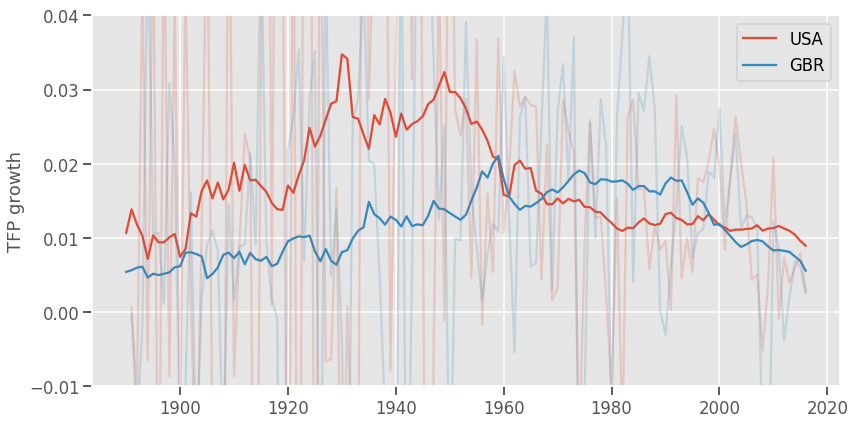

In [29]:
(
    tfp[["USA", "GBR"]]
    .rolling(30, center=True, min_periods=0)
    .mean()
    .plot(figsize=(12, 6))
    .legend(ncol=2)
)
[next(plt.gca()._get_lines.prop_cycler)["color"] for i in range(5)]
tfp[["USA", "GBR"]].plot(alpha=0.2, ax=plt.gca()).legend(ncol=2)
plt.ylim([-0.01, 0.04])
plt.ylabel("TFP growth")
plt.legend(["USA", "GBR"])
plt.tight_layout()
plt.savefig("tfp_usa_gb.png")

In [35]:
fred=pd.read_excel('RTFPNAUSA632NRUG.xls')
fred['Year']=fred.observation_date.astype(str).str.replace('-01-01','').astype(int)
del fred['observation_date']

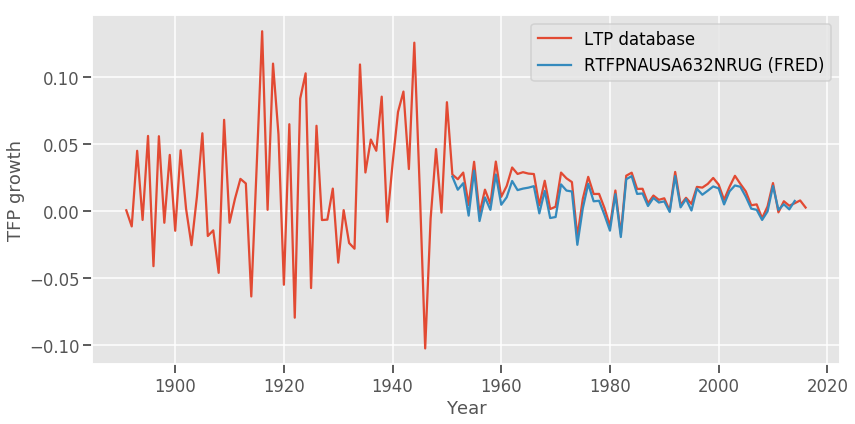

In [44]:
(
    tfp[["USA"]]
    .rolling(1, center=True, min_periods=0)
    .mean()
    .plot(figsize=(12, 6))
    .legend(ncol=2)
)
fred.set_index('Year').pipe(lambda x: x/100).plot(ax=plt.gca())
plt.ylabel("TFP growth")
plt.tight_layout()
plt.savefig("tfp_usa_gb_Fred.png")
plt.legend(['LTP database','RTFPNAUSA632NRUG (FRED)'])

In [55]:
#A.J. Field / Journal of Macroeconomics 31 (2009) 173–190
ranges=[1869,1892,1906,1919,1929,1941,1948,1973,1989,2000,2005]
rates=[1.23,1.24,.85,1.97,2.66,.84,2.13,.53,.93,1.83]
dfs=[]
for i in range(len(rates)):
    dfs.append(pd.Series({'Year':ranges[i],'TFP growth':rates[i]}))
df=pd.concat(dfs,axis=1)

In [90]:
df_field=(
    df.T.assign(
        Year=lambda x: pd.to_datetime(x.Year.astype(int), format="%Y")
    ).set_index("Year")
    .asfreq('Y',method='ffill')
    .assign(Year=lambda x: x.index.astype(str))
    .assign(Year=lambda x: x.Year.apply(lambda y: y[:4]).astype(int))
    .set_index('Year')
    .pipe(lambda x: x/100)
)

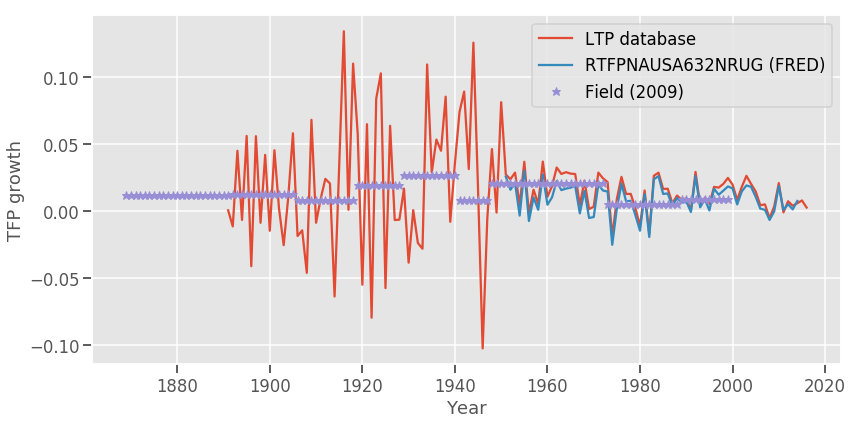

In [107]:
(
    tfp[["USA"]]
    .rolling(1, center=True, min_periods=0)
    .mean()
    .plot(figsize=(12, 6),label='LTP database')
    .legend(ncol=2)
)
fred.set_index('Year').pipe(lambda x: x/100).plot(ax=plt.gca(),label='RTFPNAUSA632NRUG (FRED)')
df_field.plot(ax=plt.gca(),marker='*',linewidth=0)
plt.legend(['LTP database','RTFPNAUSA632NRUG (FRED)','Field (2009)'])
plt.ylabel("TFP growth")
plt.tight_layout()
plt.savefig("tfp_usa_gb_Fred.png")